# Practica 3: Sensado y An&aacute;lisis Inercial 

<style>
    .imagen-ajustada {
        width: 900px;
        height: 280px;
        border-radius: 20px;
    }
</style>

<img src="Sentadillas.png" alt="Una imagen" class="imagen-ajustada">

En el notebook que se presenta a continuaci&oacute;n se tienen que procesar los datos inerciales por medio de sensores IMU, esta pr&aacute;ctica se hace con el fin de clasificar si la persona que se encuentra haciendo sentadillas lo hace de forma correcta o incorrecta, con el fin de ayudar a que se hagan de forma correcta y eviten lesiones por hacer ejercicios de forma incorrecta.
Los sensores IMU se pusieron uno en cada pantorrilla, uno en cada muslo y uno en la espalda baja del participante, siendo un total de 5 sensores. En total  fueron 10 participantes voluntarios en la toma de sus datos y as&iacute; utilizarlos en la pr&aacute;ctica, logrando as&iacute; poder entrenar nuestro modelo de forma eficiente.    

## Librer&iacute;as Importadas

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

## Manejo del dataset

En esta secci&oacute;n se empieza a definir la ruta donde estan los videos para poder extraerlos y comenzar a modelarlos dentro de un dataframe.

El código carga archivos CSV desde un directorio en un diccionario, usando los nombres de archivo como claves y los contenidos como DataFrames de pandas, de manera ordenada.

In [50]:
carpeta = "./Data/"
list_df = {}

list_df = {file[:-4]: pd.read_csv(os.path.join(carpeta, file)) for file in sorted(os.listdir(carpeta))}

In [51]:
list_df['Ariana']

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
0,3,0.00,0,0.037442,-0.887220,-0.443245,-0.368823,-1.200886,-0.566767,-25.840397,...,-0.042603,-0.010431,-0.010769,0.000900,0.000134,-0.007537,0.0,0.0,0.0,0.0
1,3,0.01,1,0.036721,-0.889475,-0.442183,-0.633702,-1.097575,-0.549118,-26.308096,...,-0.042544,-0.010426,-0.010663,0.001644,0.002314,-0.006192,0.0,0.0,0.0,0.0
2,3,0.02,2,0.032726,-0.894212,-0.439177,-0.988580,-1.114592,-0.672775,-25.957323,...,-0.043390,-0.009775,-0.010604,0.005367,0.007048,-0.003777,0.0,0.0,0.0,0.0
3,2,-0.00,0,0.021711,-0.998011,-0.022004,-0.022777,0.758312,0.276806,-52.323883,...,0.003627,-0.002929,-0.006640,-0.000606,0.000704,-0.001510,0.0,0.0,0.0,0.0
4,2,0.01,1,0.025251,-0.997908,-0.021955,-0.023209,0.516617,0.291440,-52.002338,...,0.003628,-0.002905,-0.006686,-0.004193,0.000754,-0.001559,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,1,20.43,1997,0.738899,-0.662809,-0.146655,-12.331003,-25.610823,-32.909512,-26.132710,...,0.182456,-0.292122,-0.114571,-0.074021,0.006754,-0.055387,0.0,0.0,0.0,0.0
4667,3,20.32,1951,-0.029160,-0.756100,-0.575292,-43.811047,1.105879,2.535139,-26.863489,...,0.070745,0.001073,0.128516,0.031398,0.048373,-0.044906,0.0,0.0,0.0,0.0
4668,1,20.44,1998,0.747496,-0.671228,-0.157344,-11.067548,-27.715807,-33.152092,-26.161942,...,0.184435,-0.294731,-0.112711,-0.077722,-0.001549,-0.043593,0.0,0.0,0.0,0.0
4669,3,20.33,1952,-0.013723,-0.769684,-0.603328,-44.257469,1.772645,3.551233,-27.389652,...,0.074583,0.000733,0.128144,0.011367,0.032077,-0.018233,0.0,0.0,0.0,0.0


In [52]:
list_df["Andrea"].columns

Index(['SensorId', ' TimeStamp (s)', ' FrameNumber', ' AccX (g)', ' AccY (g)',
       ' AccZ (g)', ' GyroX (deg/s)', ' GyroY (deg/s)', ' GyroZ (deg/s)',
       ' MagX (uT)', ' MagY (uT)', ' MagZ (uT)', ' EulerX (deg)',
       ' EulerY (deg)', ' EulerZ (deg)', ' QuatW', ' QuatX', ' QuatY',
       ' QuatZ', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)',
       ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',
       ' HeaveMotion (m)'],
      dtype='object')

## An&aacute;lisis Exploratorio

In [53]:
for nombre, df in list_df.items():
    print(f"Estadísticas Descriptivas para: {nombre}")
    print(df.describe())
    print("-" * 50)

Estadísticas Descriptivas para: Andrea
          SensorId   TimeStamp (s)   FrameNumber     AccX (g)     AccY (g)  \
count  8837.000000     8837.000000   8837.000000  8837.000000  8837.000000   
mean      2.654294       12.300205   1129.604956     0.087581    -0.818524   
std       1.096461        7.203817    678.096653     0.332553     0.216757   
min       1.000000        0.000000      0.000000    -0.529415    -1.075732   
25%       2.000000        6.230000    552.000000    -0.120553    -0.961907   
50%       3.000000       12.130000   1104.000000     0.067255    -0.913884   
75%       4.000000       18.050100   1656.000000     0.288664    -0.741644   
max       4.000000       26.430000   2622.000000     1.063124     0.011848   

          AccZ (g)   GyroX (deg/s)   GyroY (deg/s)   GyroZ (deg/s)  \
count  8837.000000     8837.000000     8837.000000     8837.000000   
mean     -0.235155       -0.594927        0.388790       -0.539552   
std       0.336797       15.402751        6.8405

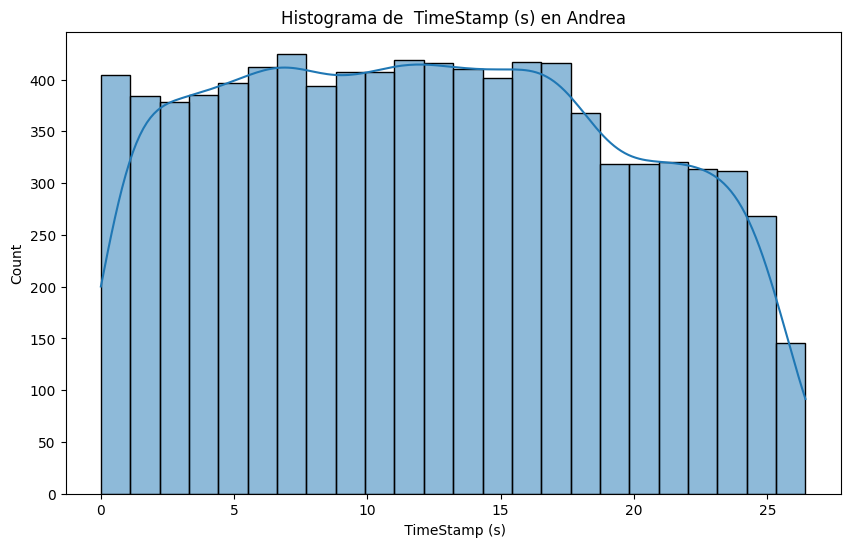

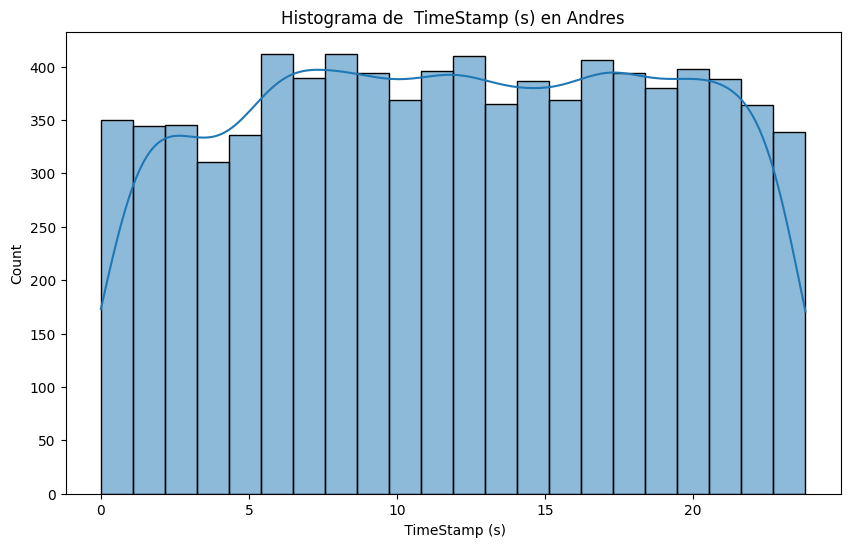

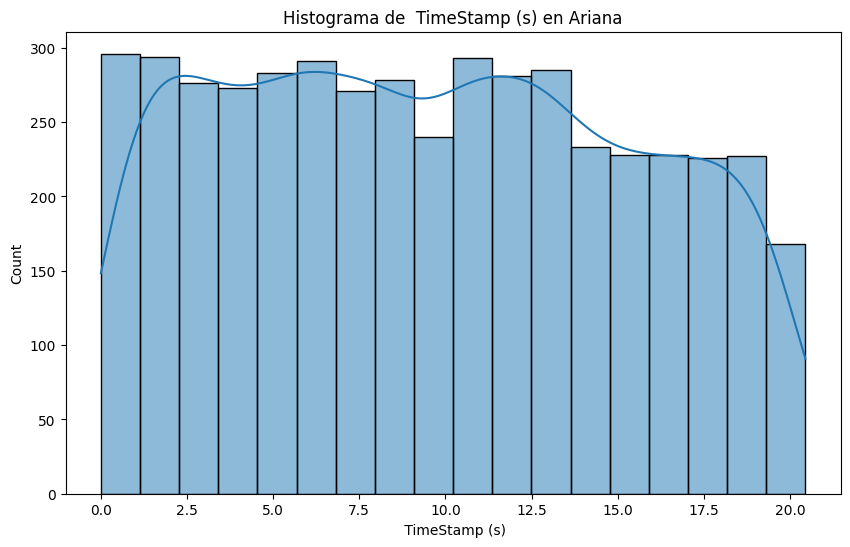

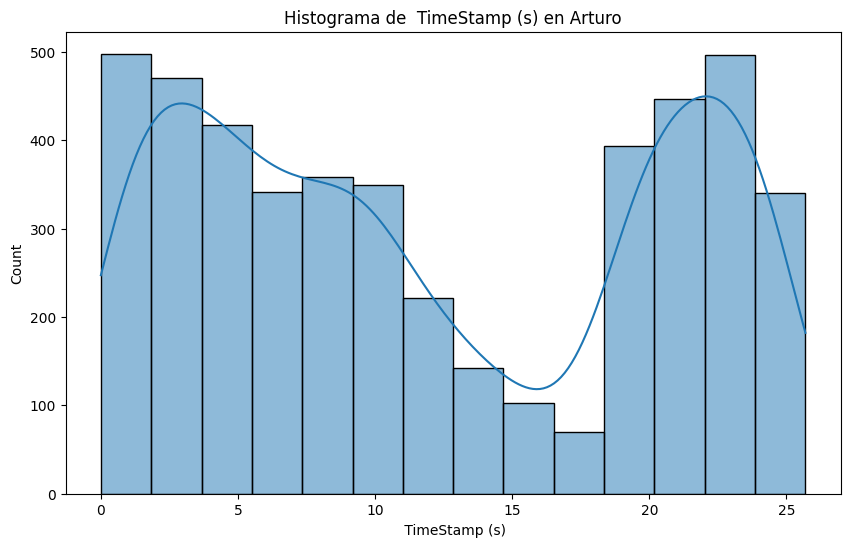

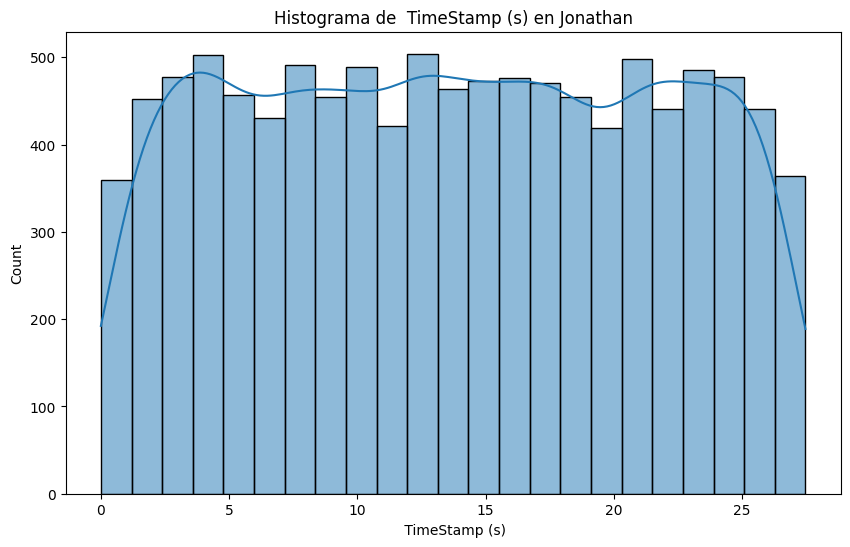

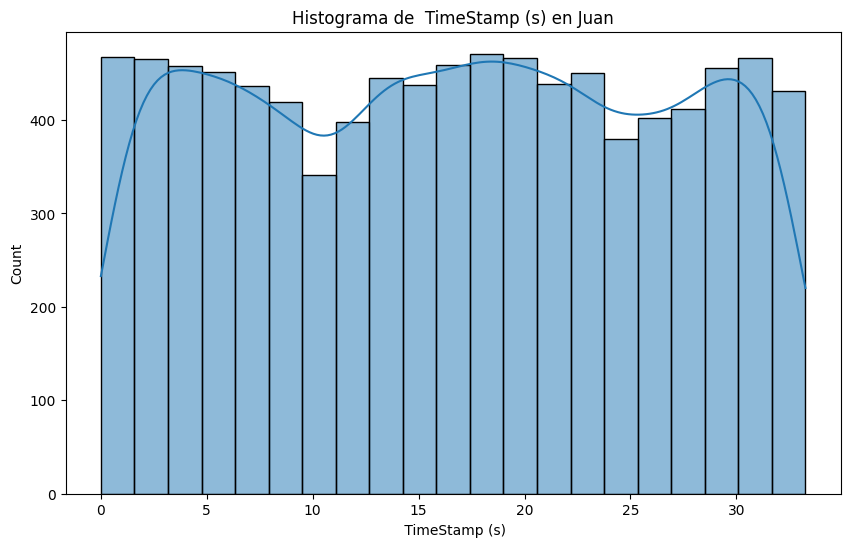

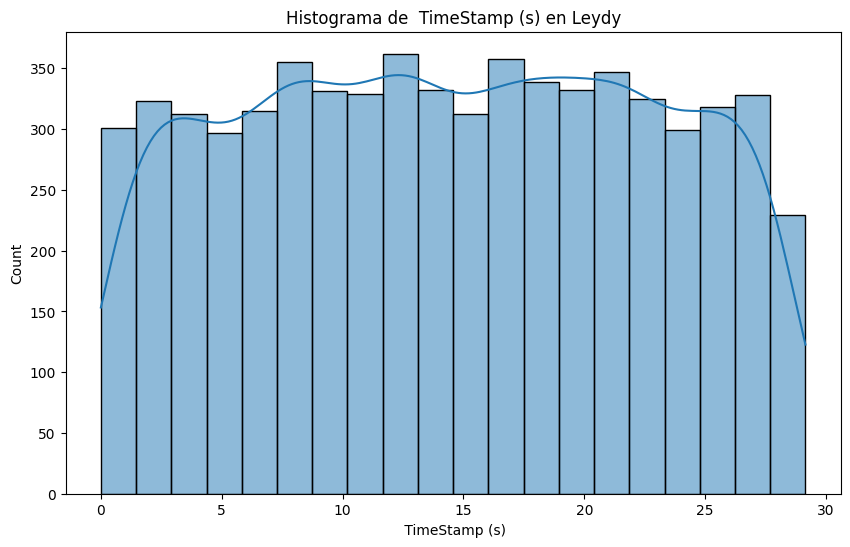

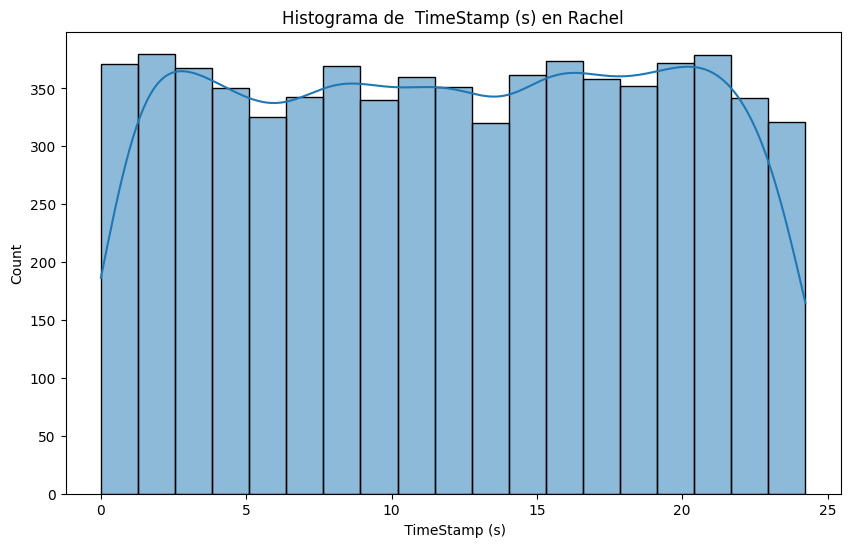

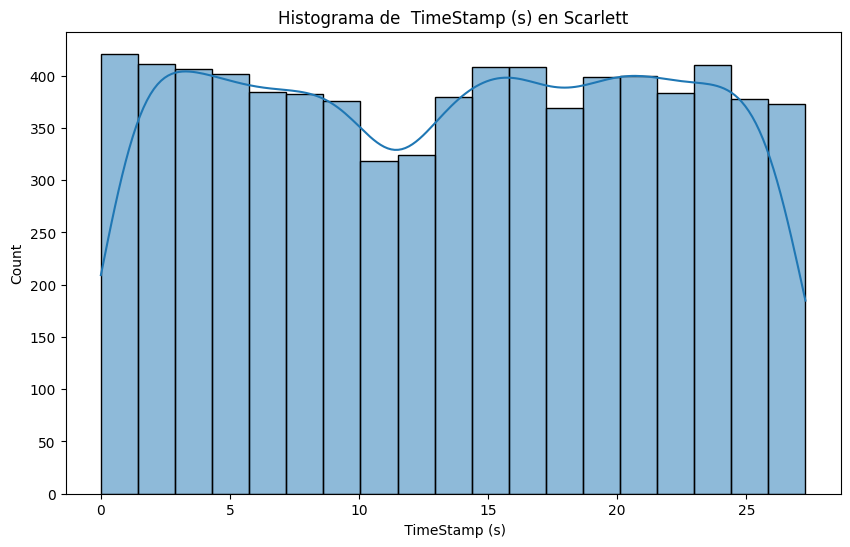

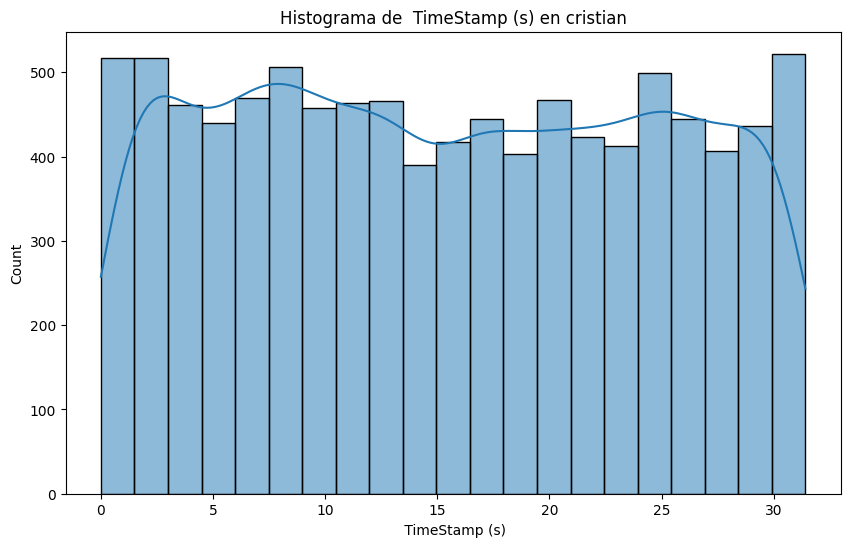

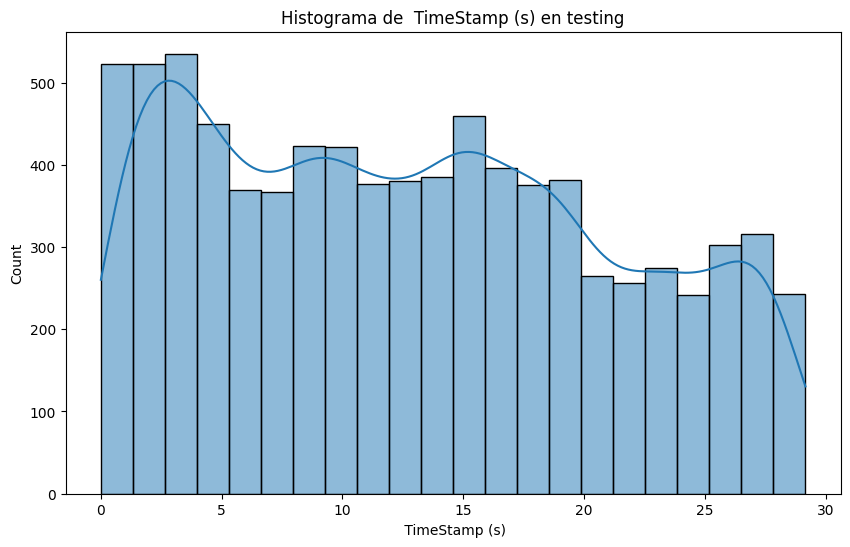

In [54]:
for nombre, df in list_df.items():
    # Ejemplo de un histograma para la primera columna numérica
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df.columns[1]], kde=True)
    plt.title(f'Histograma de {df.columns[1]} en {nombre}')
    plt.show()

## Procesamiento de Datos

Este código se encarga de limpiar los nombres de las columnas eliminando espacios innecesarios y texto dentro de paréntesis usando expresiones regulares, y actualiza los nombres de las columnas en cada DataFrame para garantizar consistencia y facilidad de acceso a los datos.

In [55]:
# Función para limpiar los nombres de las columnas
def limpiar_nombre_columnas(nombre):
    # Elimina espacios al principio y al final, y contenido en paréntesis
    nombre_limpio = re.sub(r'\s*\([^)]*\)', '', nombre).strip()
    return nombre_limpio

# Aplicar la limpieza a los nombres de las columnas de cada DataFrame
for key, df in list_df.items():
    df.rename(columns={col: limpiar_nombre_columnas(col) for col in df.columns}, inplace=True)

In [56]:
list_df['Andrea'].columns

Index(['SensorId', 'TimeStamp', 'FrameNumber', 'AccX', 'AccY', 'AccZ', 'GyroX',
       'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ', 'EulerX', 'EulerY', 'EulerZ',
       'QuatW', 'QuatX', 'QuatY', 'QuatZ', 'LinAccX', 'LinAccY', 'LinAccZ',
       'Pressure', 'Altitude', 'Temperature', 'HeaveMotion'],
      dtype='object')

In [57]:
list_df['Andrea']

,SensorId,TimeStamp,FrameNumber,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagX,...,QuatX,QuatY,QuatZ,LinAccX,LinAccY,LinAccZ,Pressure,Altitude,Temperature,HeaveMotion
0,4,0.0000,0,0.068477,-0.912087,-0.383380,1.833206,-0.045396,0.063953,-23.969599,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1,-0.0000,0,0.066376,-0.999555,0.080106,-0.186473,0.771407,-1.015720,-47.033031,...,-0.001200,0.002248,0.001738,-0.000798,0.004874,0.004934,0.0,0.0,0.0,0.0
2,1,0.0100,1,0.058749,-1.001864,0.082250,-0.363923,0.525834,-0.746620,-47.091492,...,-0.001171,0.002187,0.001685,0.007115,0.006890,0.006854,0.0,0.0,0.0,0.0
3,1,0.0200,2,0.052185,-1.004004,0.081673,0.067433,0.339616,-0.618345,-46.448406,...,-0.001620,0.003778,0.001716,0.013101,0.005960,0.008488,0.0,0.0,0.0,0.0
4,1,0.0300,3,0.047747,-1.008838,0.079371,0.327756,-0.387092,-0.698904,-46.769951,...,-0.001646,0.003714,0.001747,0.015503,0.002597,0.012837,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8832,2,25.6301,2299,-0.454521,-0.880524,0.027616,3.595888,-0.941252,2.442337,-66.004089,...,-0.130685,0.120562,-0.345079,-0.009045,0.025488,-0.010969,0.0,0.0,0.0,0.0
8833,3,25.5900,2223,0.430438,-0.918506,0.080576,-0.775975,7.144113,-8.995694,-12.160187,...,-0.058979,-0.202557,0.069933,-0.001030,0.034472,0.014933,0.0,0.0,0.0,0.0
8834,4,26.4200,2621,0.109173,-0.227898,-0.974022,-38.953529,9.114608,-5.266281,-26.191172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8835,3,25.6000,2224,0.423440,-0.908016,0.112348,-1.892509,10.033885,-8.801491,-12.715580,...,-0.059069,-0.203303,0.069033,0.006956,0.065329,0.003487,0.0,0.0,0.0,0.0


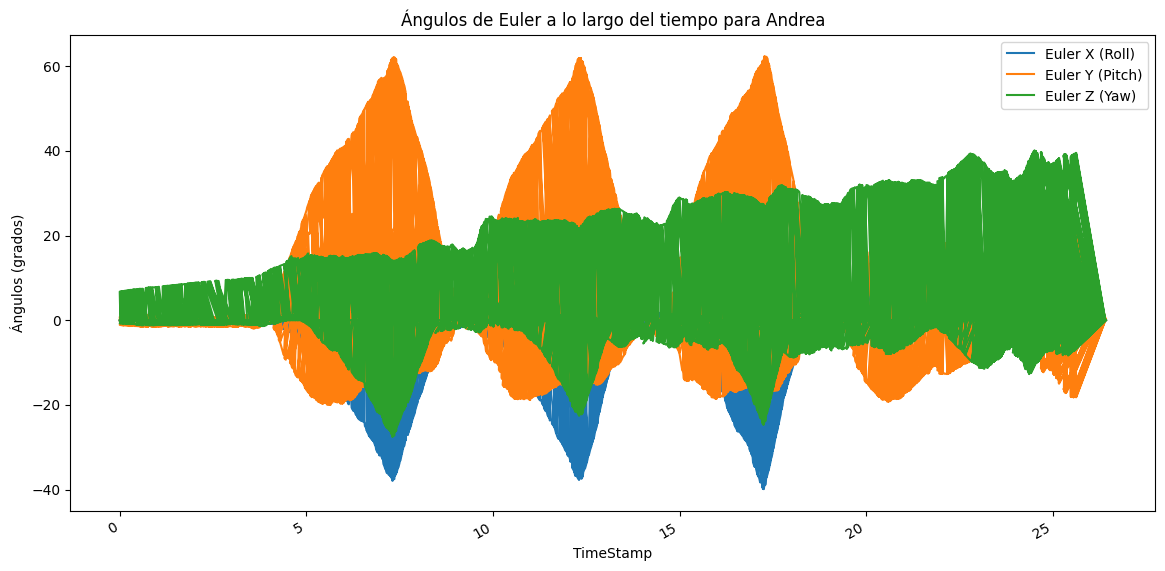

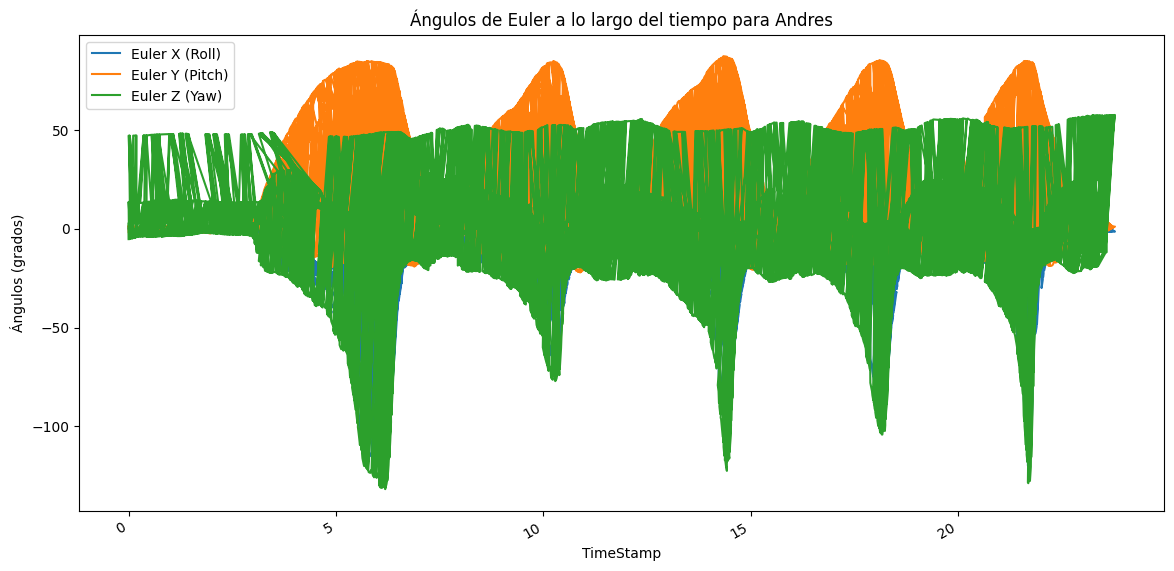

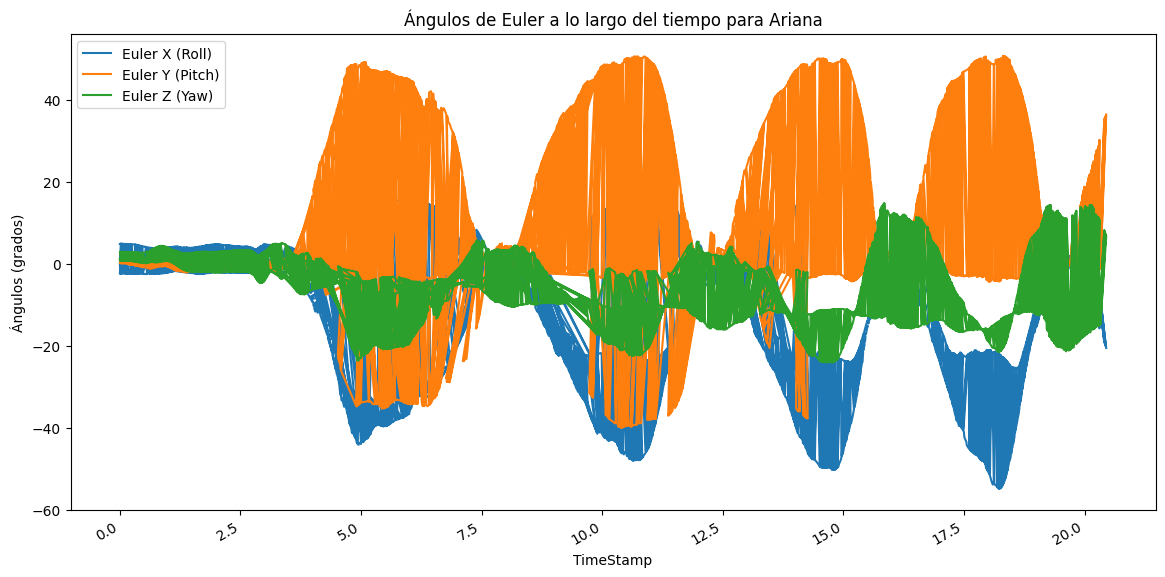

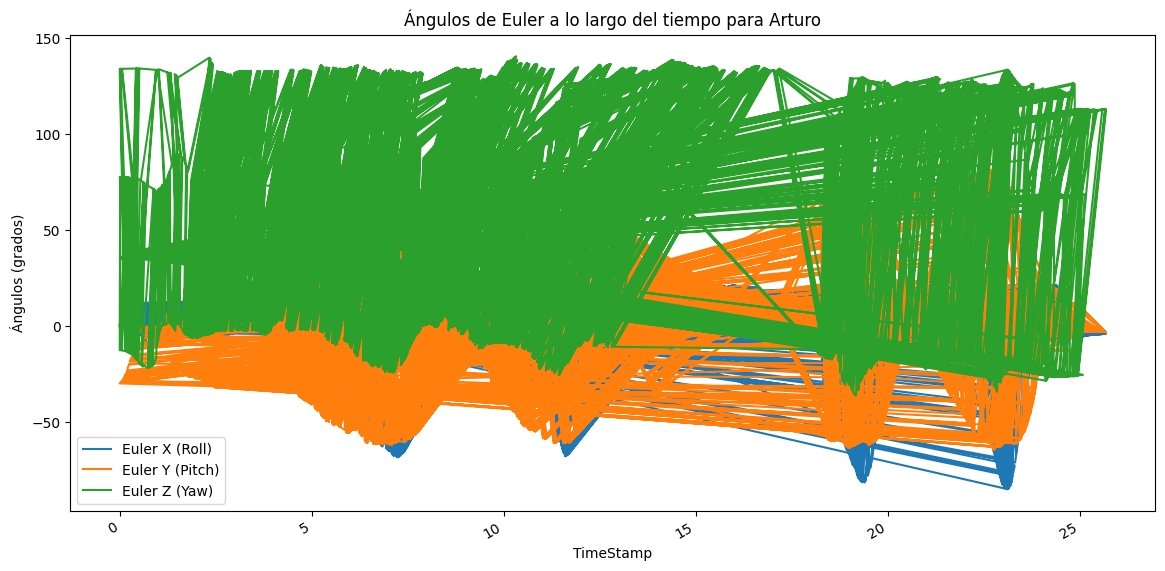

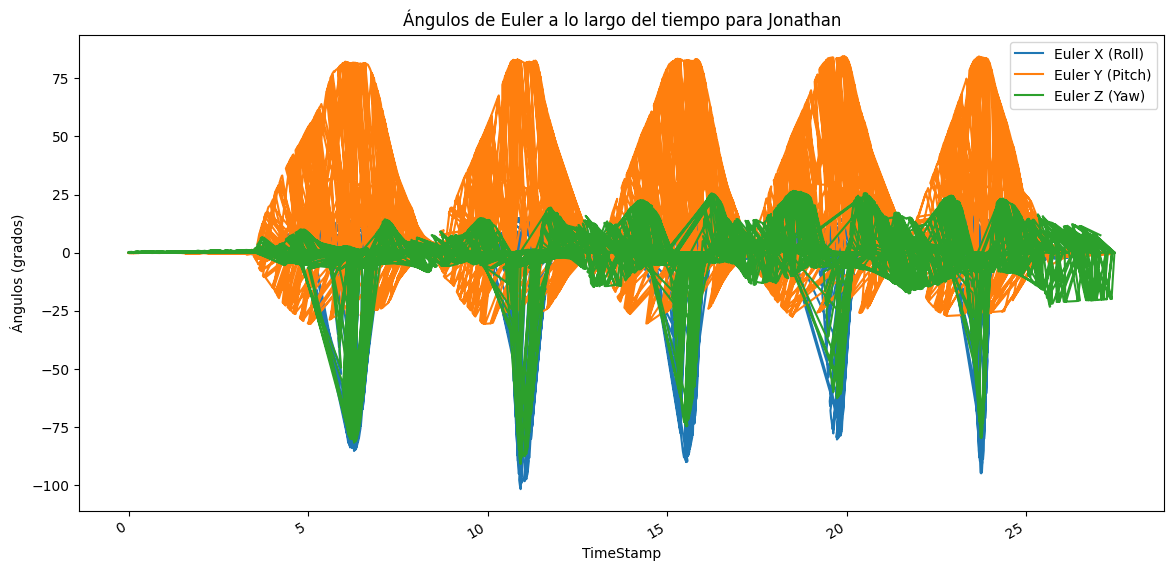

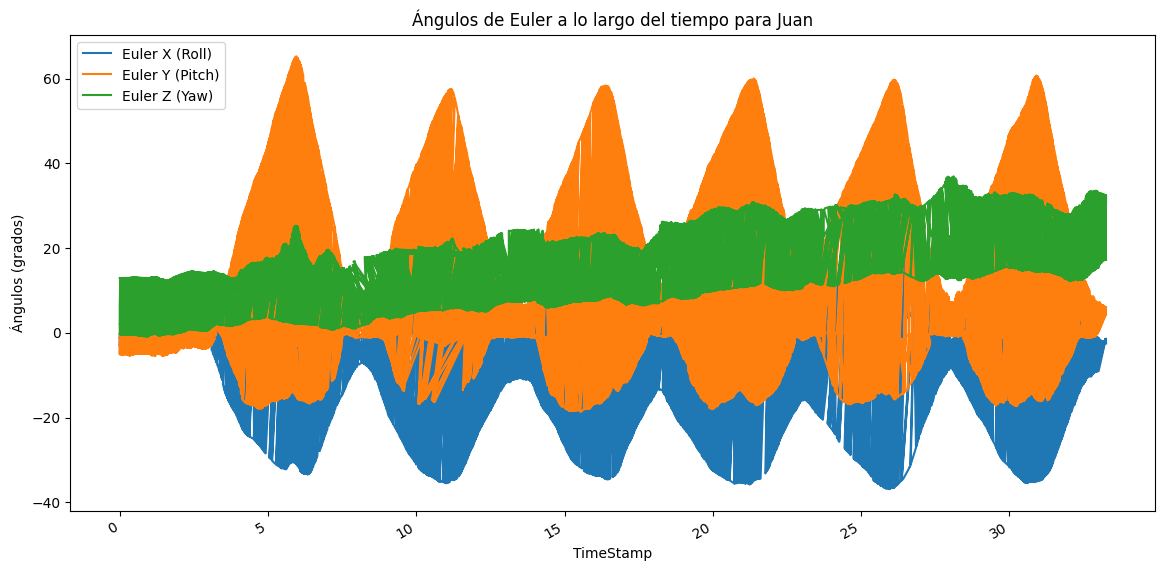

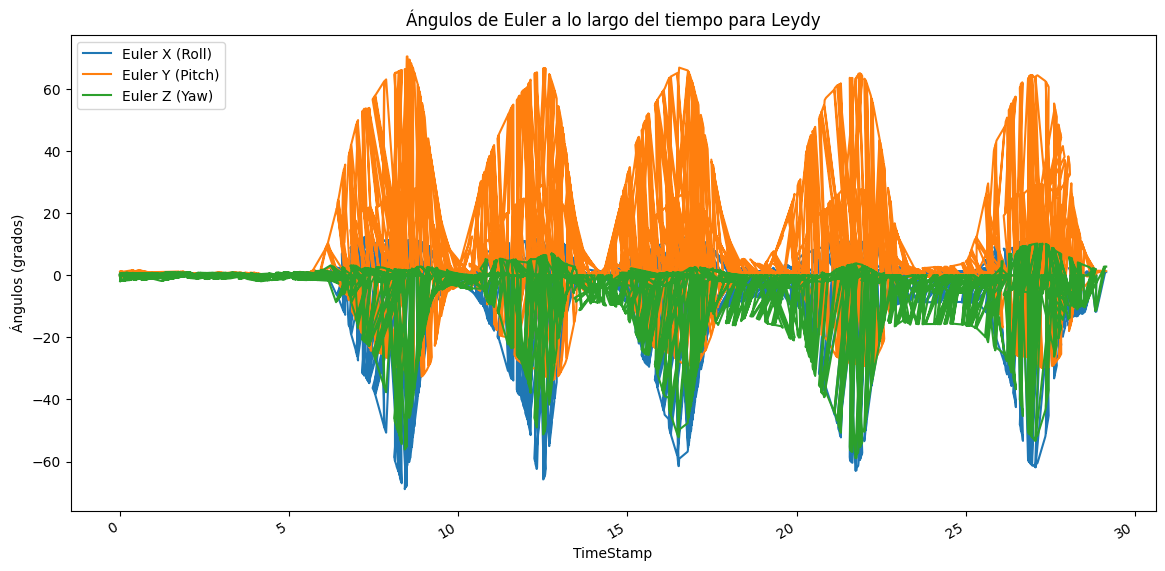

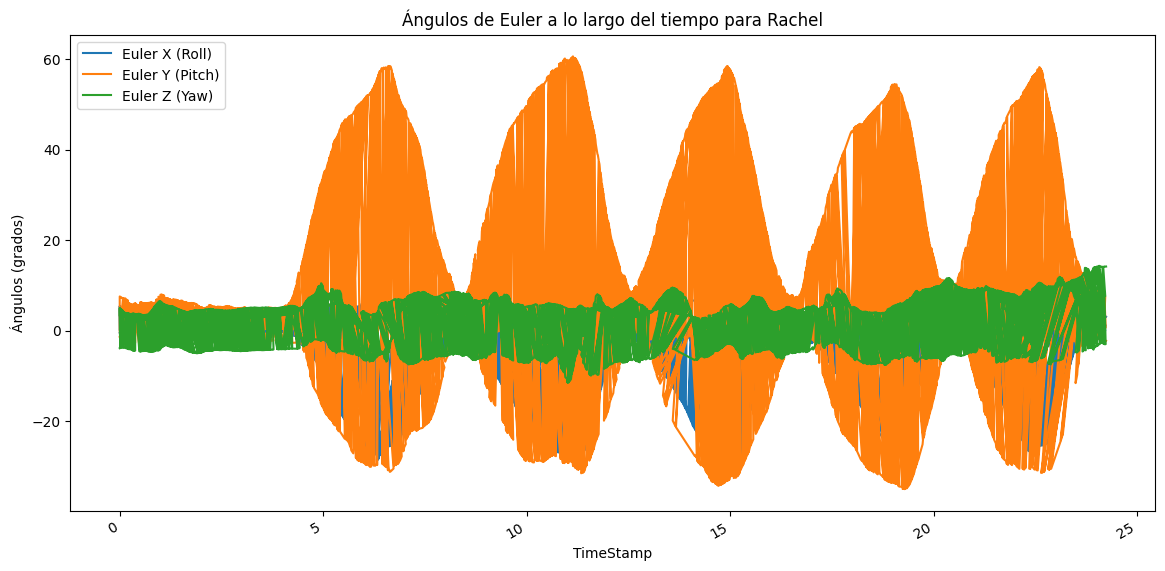

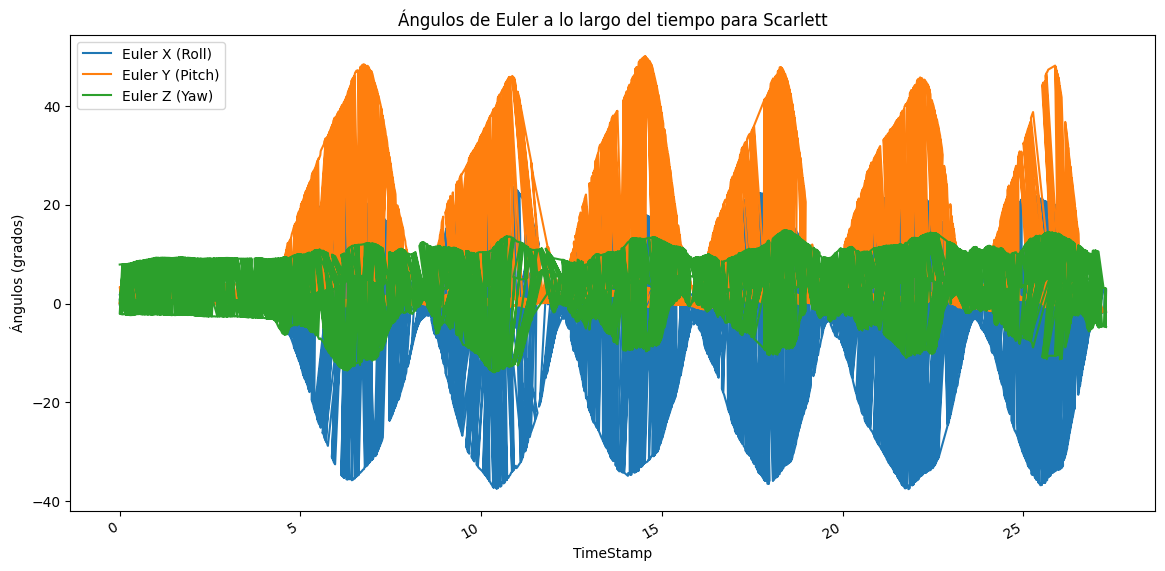

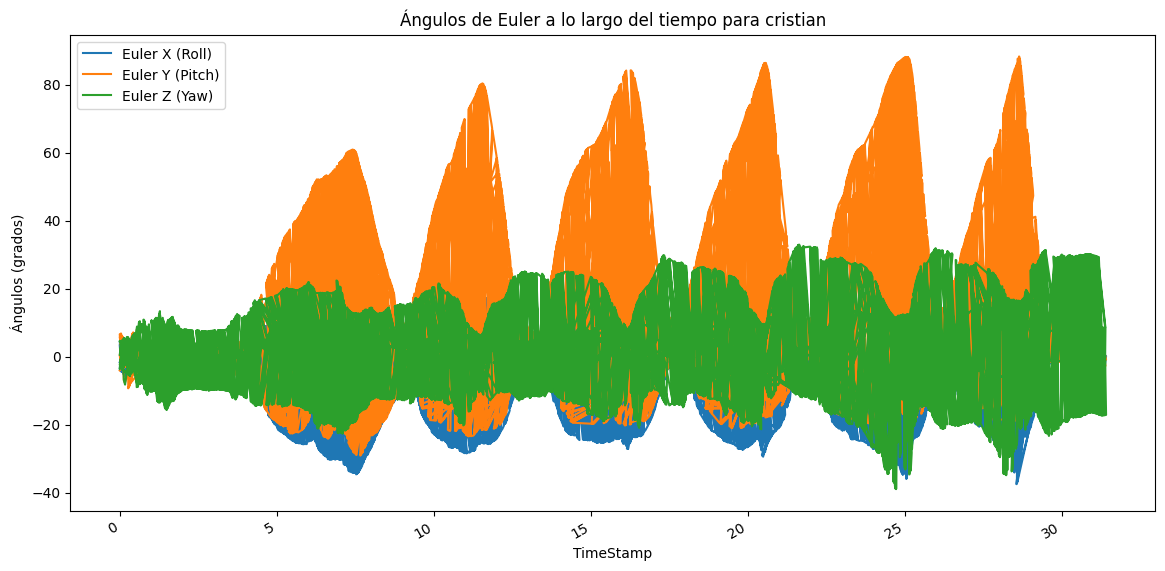

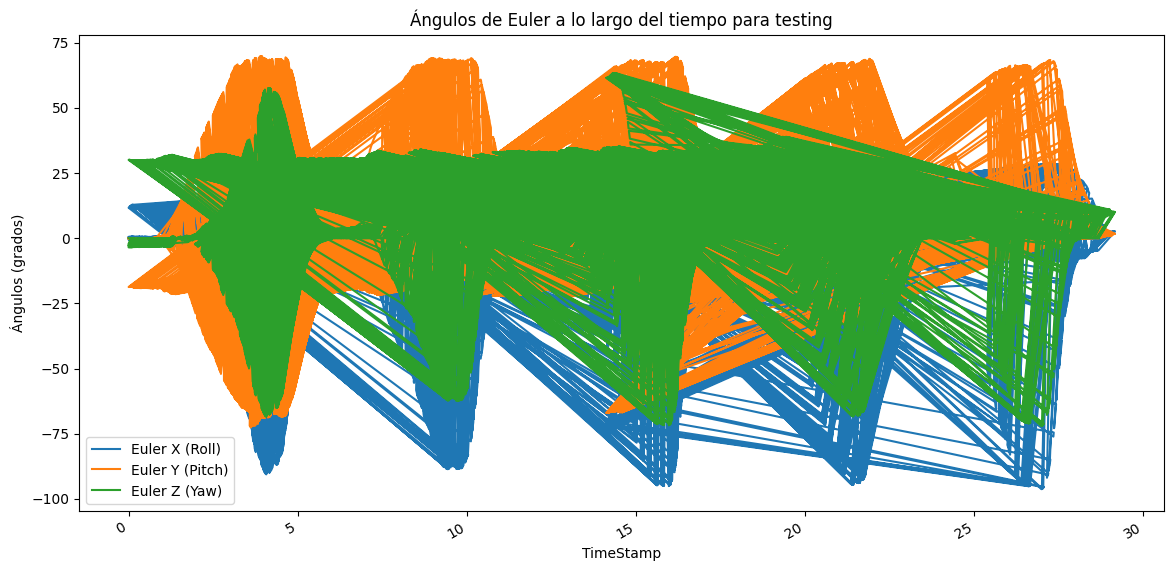

In [58]:
for nombre, df in list_df.items():
    df[' TimeStamp'] = pd.to_datetime(df['TimeStamp'])

    plt.figure(figsize=(14, 7))

    # Graficar cada uno de los ángulos de Euler
    plt.plot(df['TimeStamp'], df['EulerX'], label='Euler X (Roll)')
    plt.plot(df['TimeStamp'], df['EulerY'], label='Euler Y (Pitch)')
    plt.plot(df['TimeStamp'], df['EulerZ'], label='Euler Z (Yaw)')

    # Añadir leyenda
    plt.legend()

    # Añadir títulos y etiquetas
    plt.title(f'Ángulos de Euler a lo largo del tiempo para {nombre}')
    plt.xlabel('TimeStamp')
    plt.ylabel('Ángulos (grados)')

    # Mejorar la presentación de la fecha en el eje X si es necesario
    plt.gcf().autofmt_xdate()

    plt.show()


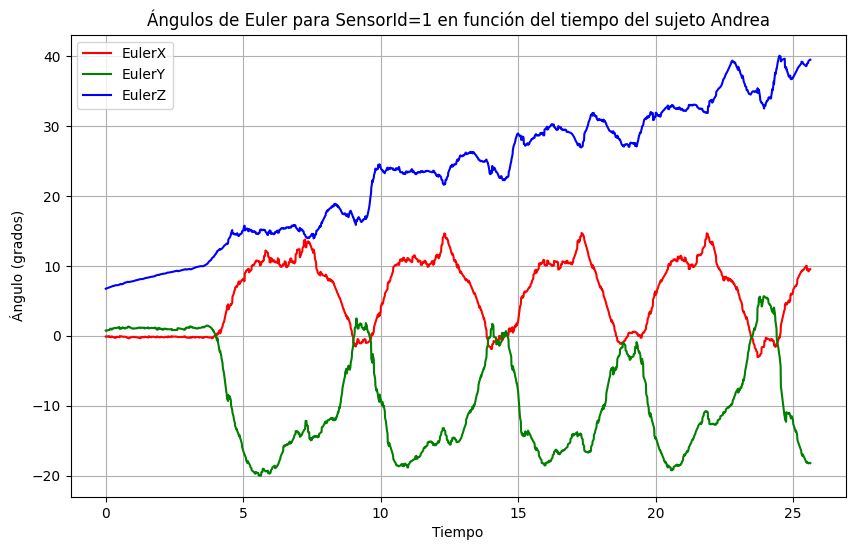

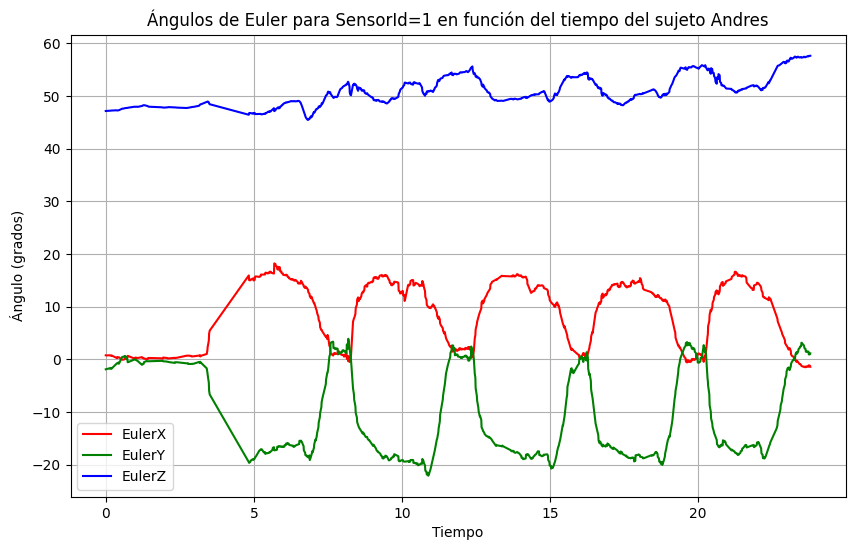

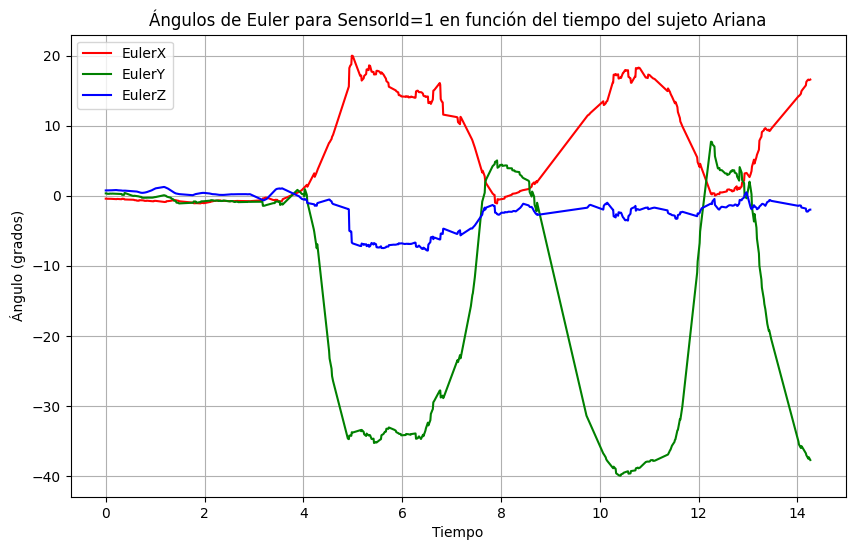

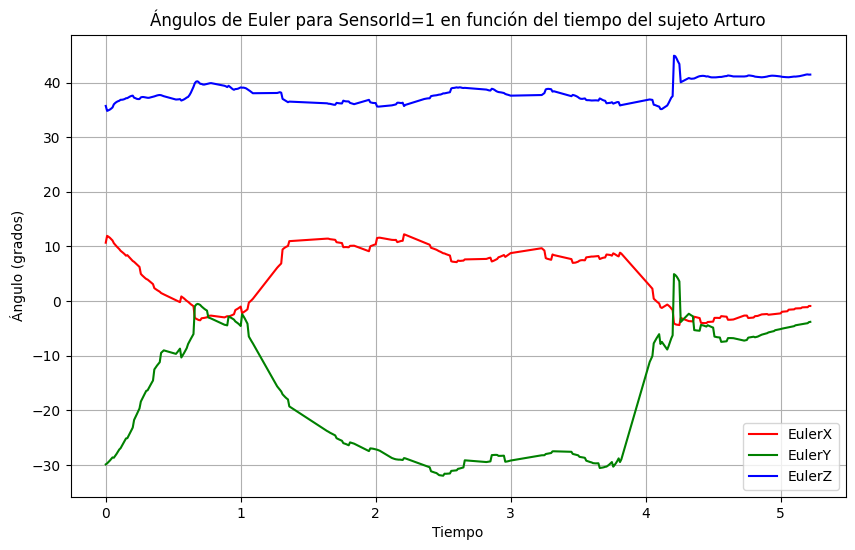

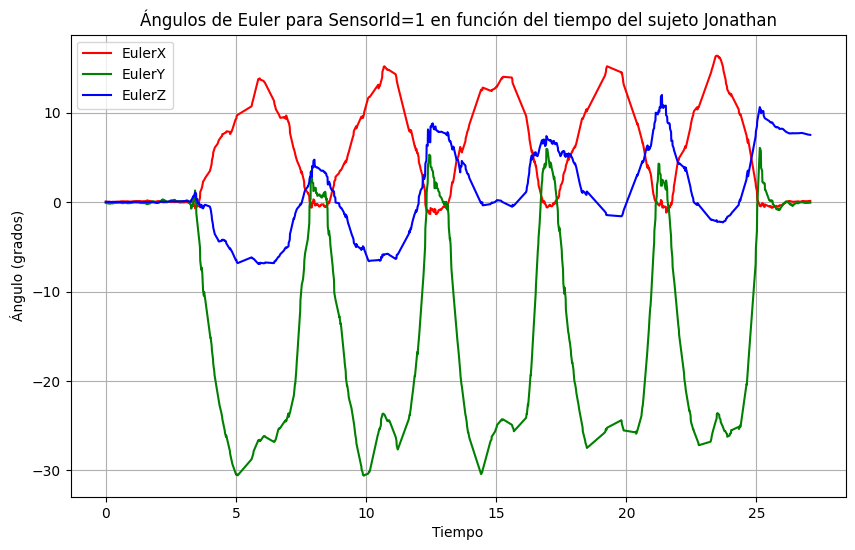

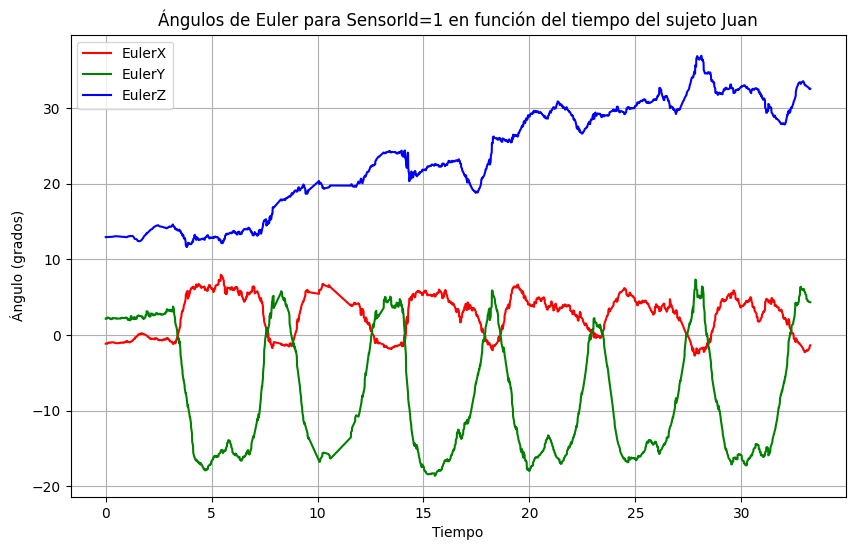

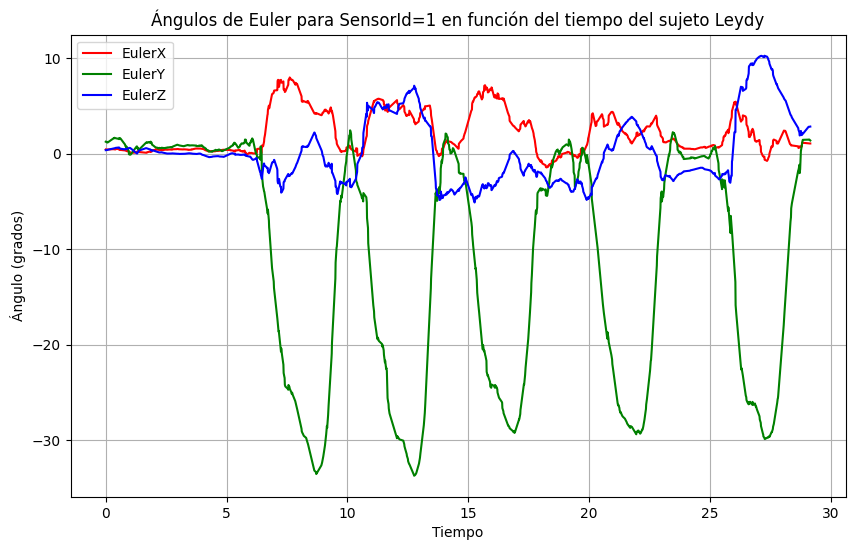

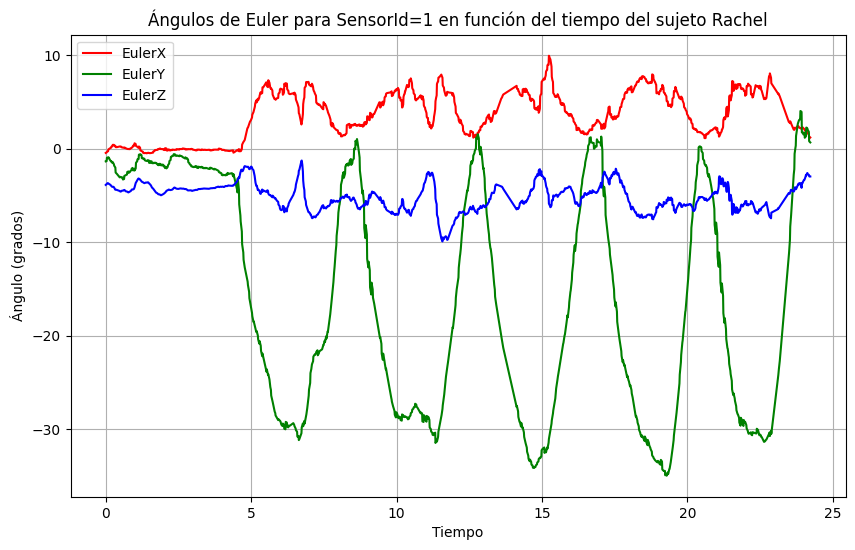

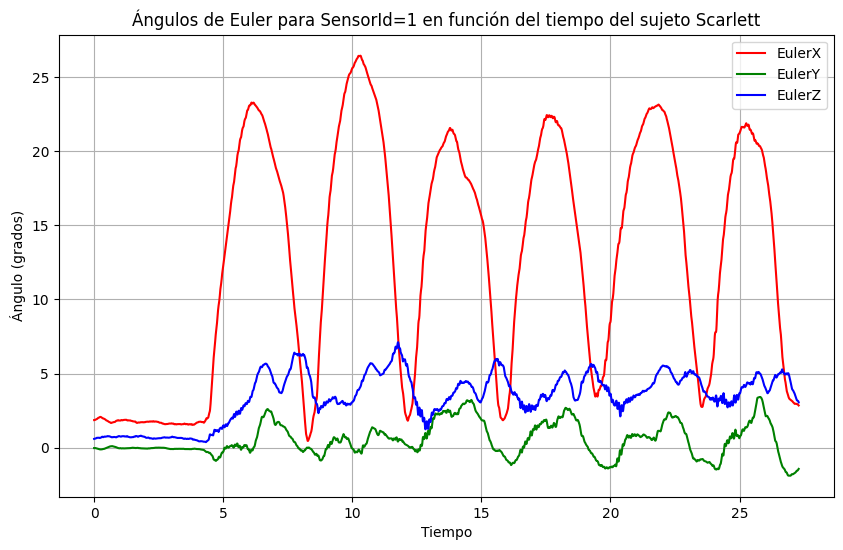

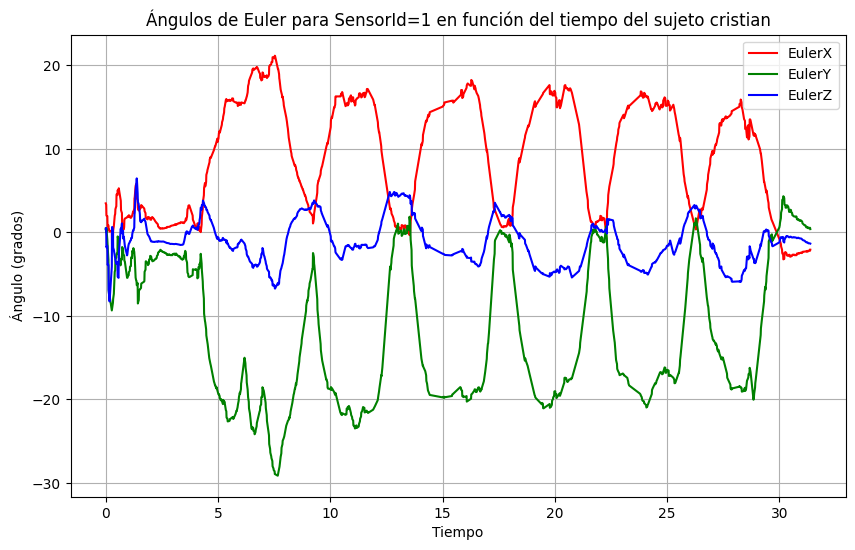

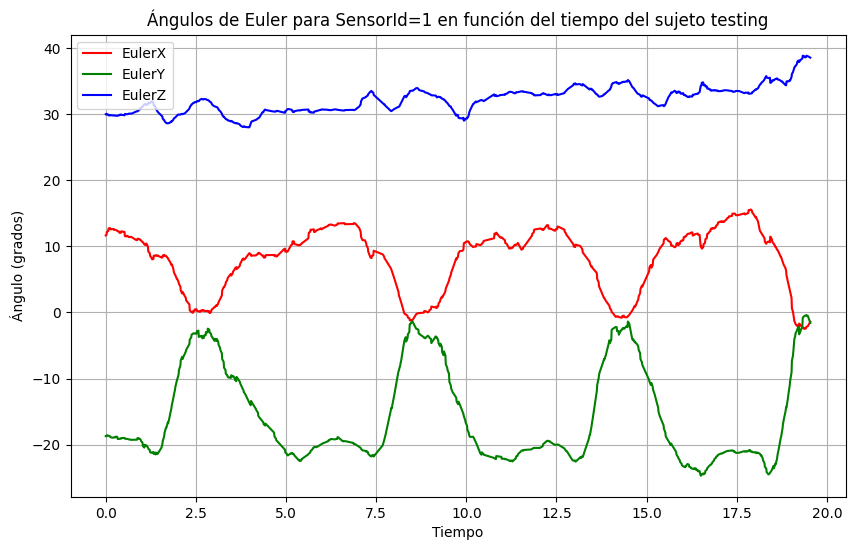

In [68]:
for index in list_df:
    df = list_df[index]
    
    df_sensor_id = df[df['SensorId'] == 2]

    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerX'], label='EulerX', color='red')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerY'], label='EulerY', color='green')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerZ'], label='EulerZ', color='blue')
    plt.title(f'Ángulos de Euler para SensorId=1 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Ángulo (grados)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Extracci&oacute;n de Caracter&iacute;sticas

In [60]:
def extraer_caracteristicas_estadisticas(list_df):
    caracteristicas = {}
    for columna in df.columns:
        caracteristicas[f'{columna}_media'] = df[columna].mean()
        caracteristicas[f'{columna}_std'] = df[columna].std()
        # Añadir más estadísticas según se requiera
    return caracteristicas


In [61]:
caracteristicas_df = {}

for nombre, df in list_df.items():
    caracteristicas_df[nombre] = extraer_caracteristicas_estadisticas(df)


## Selecci&oacute;n de Caracter&iacute;sticas

## Modelos a Evaluar

## Evaluando el mejor modelo

## Entrenando al modelo

## Implementando el modelo

## Conclusiones